In [1]:
import pandas as pd 
import altair as alt
import matplotlib.pyplot as plt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
print(alt.data_transformers.active)

default


In [3]:
df = pd.read_csv("./CO2 Emissions_DS4200.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


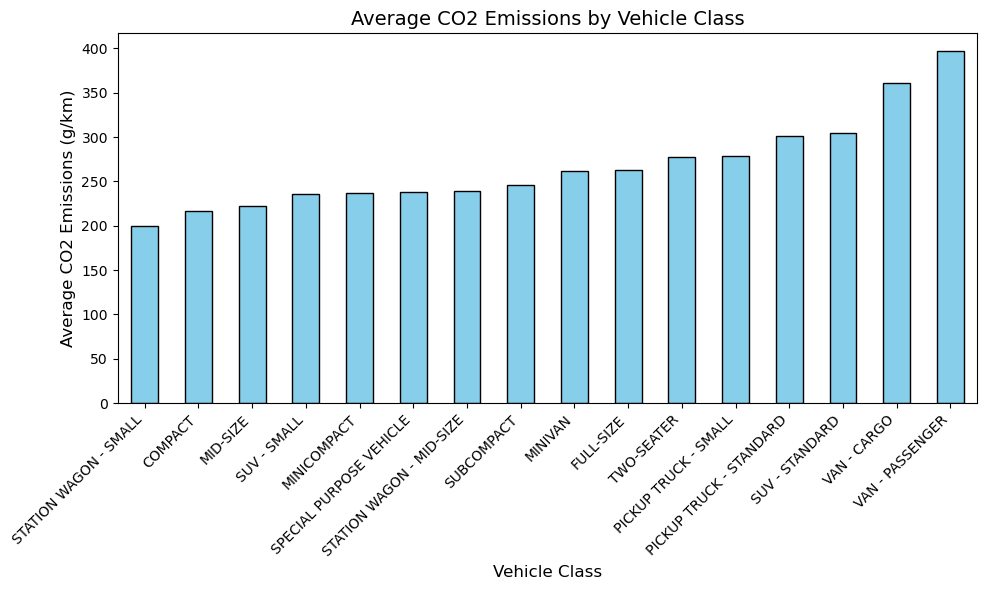

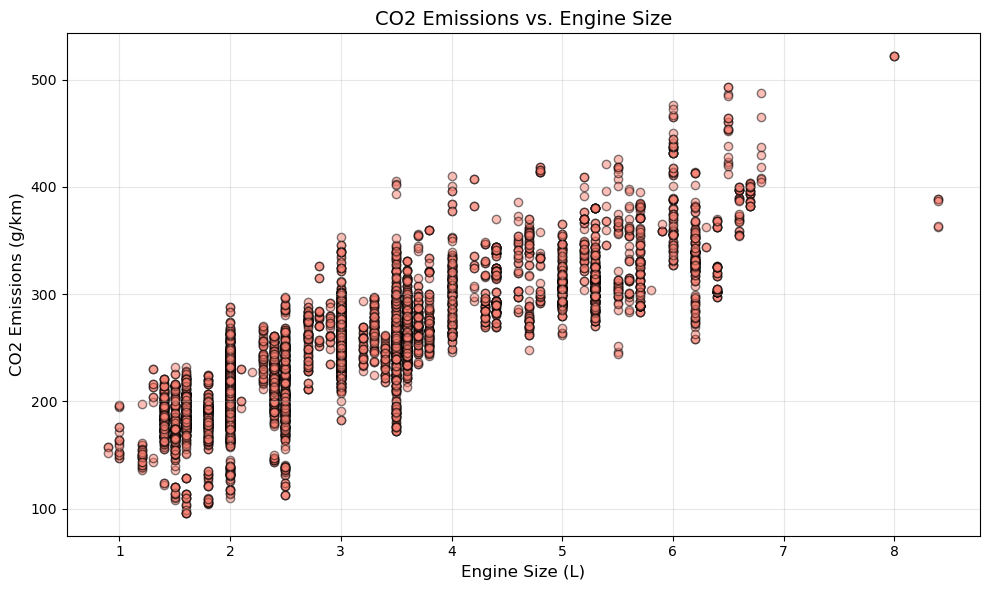

In [4]:
# First Visualization: CO2 Emissions by Vehicle Class
vehicle_class_emissions = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values()

plt.figure(figsize=(10, 6))
vehicle_class_emissions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average CO2 Emissions by Vehicle Class', fontsize=14)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('Average CO2 Emissions (g/km)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Second Visualization: Relationship Between Engine Size and CO2 Emissions
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], alpha=0.5, color='salmon', edgecolors="black")
plt.title('CO2 Emissions vs. Engine Size', fontsize=14)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [5]:
cylinder_count = df['Cylinders'].value_counts()
cylinder_count

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

In [6]:
df['Cylinders'] = df['Cylinders'].astype(str)
df['Cylinders']

0       4
1       4
2       4
3       6
4       6
       ..
7380    4
7381    4
7382    4
7383    4
7384    4
Name: Cylinders, Length: 7385, dtype: object

In [19]:
cylinder_slider = alt.binding_range(
    min=3,  
    max=16,
    step=1,
    name="Number of Cylinders: "
)

slider_selection = alt.selection_point(
    name="cylinder_filter",  
    fields=['Cylinders'],    
    bind=cylinder_slider,    
    value=4                  
)

# Create basic chart
chart = alt.Chart(df).mark_circle(size=60, opacity=0.6).encode(
    x=alt.X('Fuel Consumption Comb (mpg):Q', title='Fuel Consumption (mpg)'),
    y=alt.Y('CO2 Emissions(g/km):Q', title='CO2 Emissions (g/km)'),
    tooltip=['Make:N', 'Model:N', 'Cylinders:N', 'Fuel Consumption Comb (mpg):Q', 'CO2 Emissions(g/km):Q'],
    color=alt.Color('Cylinders:N', scale=alt.Scale(scheme='blues')),
).transform_filter(
    f"datum.Cylinders == {slider_selection.name}.Cylinders"
).properties(
    width=400,
    height=400,
    title='Scatterplot of Combined Fuel Consumption and CO2 Emissions'
).add_params(
    slider_selection
)

chart.save("interactive_visualization.html")

In [20]:
chart

alt.Chart(...)

In [9]:
df_two = df[['Make', 'CO2 Emissions(g/km)']]
df_avg_emissions = df_two.groupby('Make', as_index=False)['CO2 Emissions(g/km)'].mean()
df_avg_emissions.head()

,Make,CO2 Emissions(g/km)
0,ACURA,223.652778
1,ALFA ROMEO,224.900000
2,ASTON MARTIN,339.617021
3,AUDI,250.846154
4,BENTLEY,362.934783


In [10]:
Make_options = [None] + sorted(df['Make'].drop_duplicates().tolist())  
Make_labels = ['All'] + sorted(df['Make'].drop_duplicates().tolist())

In [11]:
make1_dropdown = alt.binding_select(options=Make_options, labels=Make_labels, name='Select The Second Vehicle Here: ')
make2_dropdown = alt.binding_select(options=Make_options, labels=Make_labels, name='Select The First Vehicle Here: ')
make1_selection = alt.selection_single(fields=['Make'], bind=make1_dropdown)
make2_selection = alt.selection_single(fields=['Make'], bind=make2_dropdown)

sec_chart = alt.Chart(df_avg_emissions).mark_bar(
    color='steelblue'  
).encode(
    alt.Y('Make:N', title='Make', sort='-x'),  
    alt.X('CO2 Emissions(g/km):Q', title='Average CO2 Emissions (g/km)'),
    alt.Tooltip(['Make:N', 'CO2 Emissions(g/km):Q'])
).transform_filter(
    make1_selection | make2_selection
).add_selection(
    make1_selection, make2_selection
).properties(
    title='Average CO2 Emissions by Make',
    width=600,
    height=400
)

sec_chart.save("sec_interactive_visualization.html")

C:\Users\nhani\AppData\Local\Temp\ipykernel_63724\799791962.py:3: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  make1_selection = alt.selection_single(fields=['Make'], bind=make1_dropdown)
C:\Users\nhani\AppData\Local\Temp\ipykernel_63724\799791962.py:4: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  make2_selection = alt.selection_single(fields=['Make'], bind=make2_dropdown)
C:\Users\nhani\AppData\Local\Temp\ipykernel_63724\799791962.py:6: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  sec_chart = alt.Chart(df_avg_emissions).mark_bar(


In [12]:
sec_chart

alt.Chart(...)